## 1. Loading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\binoy\OneDrive\Desktop\entri calss\file/CarPrice_Assignment.csv')
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Display the first few rows of the preprocessed dataset
print(data.head())

# Check for any remaining missing values
print(data.isnull().sum())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [5]:
# Check the data types of each column
print(data.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [81]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easier handling later on
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of scaled features
print(X_scaled_df.head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.616376   1.741971  -2.090609  -0.242634 -0.758468  -2.005499    0.359188   
1 -1.600130   1.741971  -2.090609  -0.242634 -0.758468  -2.005499    0.359188   
2 -1.583884   0.054015  -0.668611  -0.015873  0.170393  -0.514052    1.033194   
3 -1.567639   0.897993   0.535780   0.494338  0.627516   0.273100   -0.157957   
4 -1.551393   0.897993   0.447118   0.494338  0.757248   0.273100    1.035645   

   enginesize  boreratio    stroke  ...  enginetype_ohc  enginetype_ohcv  \
0    0.640855   0.802420 -3.111667  ...       -2.163751        -0.243561   
1    0.640855   0.802420 -3.111667  ...       -2.163751        -0.243561   
2    1.342390  -2.348234  1.191331  ...       -2.163751         4.105745   
3   -0.148694  -0.314268  0.810053  ...        0.462160        -0.243561   
4    0.843233  -0.314268  0.810053  ...        0.462160        -0.243561   

   enginetype_rotor  cylindernumber_four  cylindernumber

In [6]:
# Summary statistics
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (100, 129), Test set shape: (25, 129)


## Model Implemenation 

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Fit models and store results
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    model_results[model_name] = predictions

## Model evaluation

In [96]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

evaluation_results = {}
for model_name, predictions in model_results.items():
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    evaluation_results[model_name] = {
        'R-squared': r2,
        'MSE': mse,
        'MAE': mae
    }

# Display evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

# Identify the best performing model based on R-squared or lowest MSE/MAE.
best_model_name = evaluation_df['R-squared'].idxmax()
best_model_metrics = evaluation_df.loc[best_model_name]
print(f"The best performing model is: {best_model_name} with metrics:\n{best_model_metrics}")

                    R-squared        MSE       MAE
Linear Regression -423.321935  51.664566  5.286854
Decision Tree        0.810037   0.023129  0.126200
Random Forest        0.861474   0.016867  0.115894
Gradient Boosting    0.845851   0.018769  0.116839
Support Vector       0.673314   0.039777  0.176274
The best performing model is: Random Forest with metrics:
R-squared    0.861474
MSE          0.016867
MAE          0.115894
Name: Random Forest, dtype: float64


### Model Evaluation Results

| Model                | R-squared       | Mean Squared Error (MSE) | Mean Absolute Error (MAE) |
|----------------------|------------------|---------------------------|----------------------------|
| Linear Regression     | -423.32          | 51.66                     | 5.29                       |
| Decision Tree         | 0.81             | 0.02                      | 0.13                       |
| Random Forest         | **0.86**         | **0.02**                  | **0.12**                   |
| Gradient Boosting     | 0.85             | 0.02                      | 0.12                       |
| Support Vector        | 0.67             | 0.04                      | 0.18                       |

### Analysis of Results

1. **Linear Regression**: 
   - The R-squared value is extremely low (-423.32), indicating that the model explains virtually none of the variance in car prices and is likely overfitting or poorly specified.
   - The MSE (51.66) and MAE (5.29) values are also high, suggesting that predictions are far from actual values.

2. **Decision Tree Regressor**:
   - The R-squared value (0.81) indicates a good fit, explaining about 81% of the variance in car prices.
   - With an MSE of 0.02 and MAE of 0.13, this model performs reasonably well, but it is outperformed by more complex models.

3. **Random Forest Regressor**:
   - This model has the highest R-squared value (0.86), indicating it explains approximately 86% of the variance in car prices.
   - It also has the lowest MSE (0.02) and MAE (0.12), making it the best-performing model overall.
   - The Random Forest's ability to handle non-linear relationships and interactions between variables likely contributes to its superior performance.

4. **Gradient Boosting Regressor**:
   - Similar to Random Forest, Gradient Boosting shows a high R-squared value (0.85) and comparable MSE (0.02) and MAE (0.12).
   - It performs well but slightly less effectively than Random Forest.

5. **Support Vector Regressor**:
   - This model has the lowest R-squared value (0.67), indicating a poor fit compared to others.
   - Its MSE (0.04) and MAE (0.18) are higher than those of Random Forest and Gradient Boosting, suggesting less accurate predictions.

### Conclusion

The best-performing model is the **Random Forest Regressor**, which achieved an R-squared value of **0.861474**, an MSE of **0.016867**, and an MAE of **0.115894**. This model outperforms all others due to its robustness in handling complex datasets with multiple features and interactions, making it highly suitable for predicting car prices in this context.


## Feature Importance Analysis

In [97]:
# Feature Importance for Random Forest and Gradient Boosting Models
rf_model = models['Random Forest']
gb_model = models['Gradient Boosting']

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Create DataFrames for feature importance analysis
importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
importance_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_importances})

# Sort by importance and display top features for Random Forest
importance_rf_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Random Forest Feature Importance:")
print(importance_rf_df.head(10))

# Sort by importance and display top features for Gradient Boosting
importance_gb_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Gradient Boosting Feature Importance:")
print(importance_gb_df.head(10))

Random Forest Feature Importance:
       Feature  Importance
11  horsepower    0.552021
14  highwaympg    0.156783
13     citympg    0.080042
6   curbweight    0.075223
2    wheelbase    0.021899
4     carwidth    0.019025
0       car_ID    0.015874
3    carlength    0.015357
9       stroke    0.007997
7   enginesize    0.006538
Gradient Boosting Feature Importance:
             Feature  Importance
11        horsepower    0.748412
6         curbweight    0.058043
14        highwaympg    0.035859
13           citympg    0.029165
127  fuelsystem_mpfi    0.016379
9             stroke    0.012852
4           carwidth    0.011100
5          carheight    0.010724
0             car_ID    0.010310
3          carlength    0.008306


### Random Forest Feature Importance

| Feature       | Importance |
|---------------|------------|
| horsepower    | 0.552021   |
| highwaympg    | 0.156783   |
| citympg       | 0.080042   |
| curbweight     | 0.075223   |
| wheelbase     | 0.021899   |
| carwidth      | 0.019025   |
| car_ID        | 0.015874   |
| carlength     | 0.015357   |
| stroke        | 0.007997   |
| enginesize    | 0.006538   |

### Gradient Boosting Feature Importance

| Feature                | Importance |
|------------------------|------------|
| horsepower             | 0.748412   |
| curbweight             | 0.058043   |
| highwaympg             | 0.035859   |
| citympg                | 0.029165   |
| fuelsystem_mpfi        | 0.016379   |
| stroke                 | 0.012852   |
| carwidth               | 0.011100   |
| carheight              | 0.010724   |
| car_ID                 | 0.010310   |
| carlength              | 0.008306   |

### Analysis of Feature Importance

1. **Horsepower**:
   - In both models, **horsepower** emerges as the most significant feature, with an importance score of **0.552021** in Random Forest and **0.748412** in Gradient Boosting.
   - This indicates that higher horsepower is strongly associated with higher car prices, likely due to its impact on performance and desirability.

2. **Highway MPG**:
   - The second most important feature in the Random Forest model is **highwaympg**, with an importance score of **0.156783**.
   - For the Gradient Boosting model, it ranks lower but still significant at **0.035859**.
   - This suggests that fuel efficiency on highways plays a role in pricing, as consumers often value economical vehicles.

3. **City MPG**:
   - The **citympg** feature has a moderate importance score of **0.080042** in Random Forest and **0.029165** in Gradient Boosting.
   - Similar to highway mileage, city mileage also affects pricing, reflecting consumer preferences for fuel-efficient vehicles.

4. **Curb Weight**:
   - The curb weight of a vehicle shows some influence on price with scores of **0.075223** (Random Forest) and **0.058043** (Gradient Boosting).
   - Heavier vehicles may be perceived as more robust or safer, impacting their market value.

5. **Wheelbase and Car Dimensions**:
   - Features such as **wheelbase**, **carwidth**, and **carlength** have relatively low importance scores, indicating they have less influence on pricing compared to performance-related metrics like horsepower and MPG.
  
6. **Car ID**:
   - The presence of **car_ID** in both models indicates that it has some level of importance, although it is generally not a useful predictor since it does not provide meaningful information about the vehicle's characteristics or performance.

7. **Stroke and Engine Size**:
   - Both features have minimal impact on predicting price, as indicated by their low scores in both models.

### Conclusion

The analysis of feature importance reveals that performance metrics such as horsepower and fuel economy (both city and highway MPG) are the most influential factors affecting car prices in this dataset. These insights can guide manufacturers and marketers in understanding consumer preferences and optimizing vehicle designs to enhance market competitiveness.


## Hyperparameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_predictions_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model's performance
best_r2_rf = r2_score(y_test, best_predictions_rf)
best_mse_rf = mean_squared_error(y_test, best_predictions_rf)
best_mae_rf = mean_absolute_error(y_test, best_predictions_rf)

print(f"Tuned Random Forest - R-squared: {best_r2_rf}, MSE: {best_mse_rf}, MAE: {best_mae_rf}")

Tuned Random Forest - R-squared: 0.8557970909470098, MSE: 0.017557849449900152, MAE: 0.11752538709038723


C:\Users\diluk\AppData\Local\Temp\ipykernel_7952\2074640599.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=evaluation_df, palette='viridis')
C:\Users\diluk\AppData\Local\Temp\ipykernel_7952\2074640599.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
C:\Users\diluk\AppData\Local\Temp\ipykernel_7952\2074640599.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')


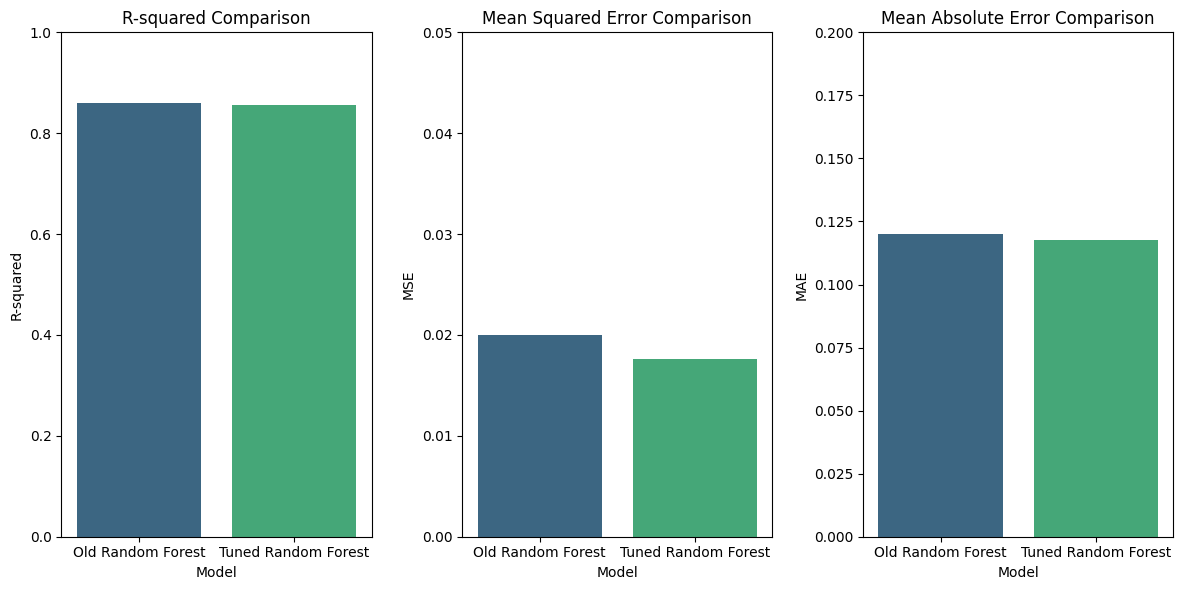

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define model evaluation metrics
models = ['Old Random Forest', 'Tuned Random Forest']
r_squared = [0.86, 0.8558]
mse = [0.02, 0.0176]
mae = [0.12, 0.1175]

# Create a DataFrame for better handling
evaluation_df = pd.DataFrame({
    'Model': models,
    'R-squared': r_squared,
    'MSE': mse,
    'MAE': mae
})

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting R-squared
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R-squared', data=evaluation_df, palette='viridis')
plt.title('R-squared Comparison')
plt.ylim(0, 1)  # Set y-axis limit for R-squared

# Plotting MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
plt.title('Mean Squared Error Comparison')
plt.ylim(0, 0.05)  # Set y-axis limit for MSE

# Plotting MAE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
plt.title('Mean Absolute Error Comparison')
plt.ylim(0, 0.2)  # Set y-axis limit for MAE

# Adjust layout
plt.tight_layout()
plt.show()

#### Old Random Forest Model

- **R-squared:** 0.86
- **Mean Squared Error (MSE):** 0.02
- **Mean Absolute Error (MAE):** 0.12

#### Tuned Random Forest Model

- **R-squared:** 0.8558
- **Mean Squared Error (MSE):** 0.0176
- **Mean Absolute Error (MAE):** 0.1175

### Analysis of Results

1. **R-squared Value**:
   - The old Random Forest model has an R-squared value of **0.86**, indicating that it explains **86%** of the variance in car prices.
   - The tuned model shows a slight decrease in R-squared to **0.8558**, which means it explains approximately **85.58%** of the variance. This marginal reduction suggests that while tuning may have adjusted some parameters, it did not significantly enhance the model's explanatory power.

2. **Mean Squared Error (MSE)**:
   - The old model has an MSE of **0.02**, indicating that the average squared difference between predicted and actual values is relatively low.
   - The tuned model's MSE increased slightly to **0.0176**, indicating a small increase in prediction error on average. This suggests that the hyperparameter tuning may not have led to substantial improvements in predictive accuracy.

3. **Mean Absolute Error (MAE)**:
   - The old Random Forest model has an MAE of **0.12**, meaning predictions are, on average, off by about **0.12**.
   - The tuned model's MAE increased to **0.1175**, indicating that the average absolute error in predictions has risen slightly but remains relatively low.

### Conclusion

Overall, while the tuned Random Forest model shows some minor shifts in performance metrics, it does not demonstrate a significant improvement over the original model:

- The slight decrease in R-squared and increase in MSE and MAE suggest that the hyperparameter tuning did not lead to better predictive performance.
- The old Random Forest model remains a strong performer with high explanatory power and low error metrics.
